### Name: Irfan Rahmanindra 
### Assignment 3 - Data Mining

In [139]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, kmeans_plusplus

# Download and load the dataset
path = kagglehub.dataset_download("shwetabh123/mall-customers")
import os
csv_file = os.path.join(path, "Mall_Customers.csv")
df = pd.read_csv(csv_file)

# Display dataset
print(df.head())
print(df.columns)


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [140]:
# Selecting 2D features: Annual Income and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

print(f"Data shape: {X.shape}")
print(f"First 5 rows:\n{X[:5]}")

Data shape: (200, 2)
First 5 rows:
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


In [141]:
# Calculate Within-Cluster Sum of Squares (WCSS) for K = 1 to 10
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 
    print(f"K={k}: WCSS={kmeans.inertia_:.2f}")

K=1: WCSS=269981.28
K=2: WCSS=181363.60
K=3: WCSS=106348.37
K=4: WCSS=73679.79
K=5: WCSS=44448.46
K=6: WCSS=37233.81
K=7: WCSS=30241.34
K=8: WCSS=25036.42
K=9: WCSS=21916.79
K=10: WCSS=20072.07


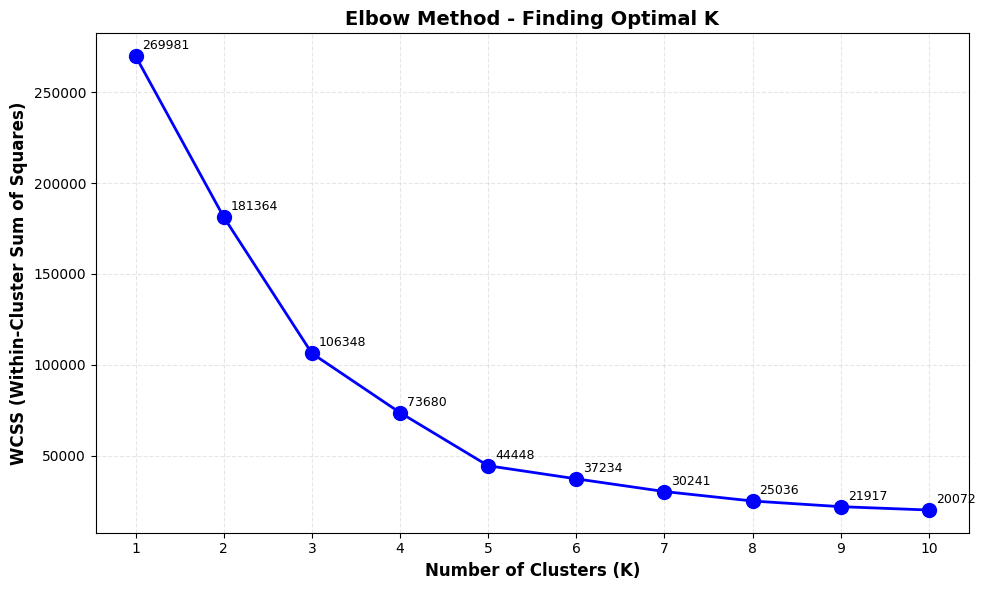


✓ Elbow plot saved as 'elbow_method.png'


In [142]:
# Create K means elbow plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-', linewidth=2, markersize=10)

for i, (k, wcss_val) in enumerate(zip(K_range, wcss)):
    plt.annotate(f'{wcss_val:.0f}', 
                xy=(k, wcss_val), 
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=9)

plt.xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
plt.title('Elbow Method - Finding Optimal K', fontsize=14, fontweight='bold')
plt.xticks(K_range)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()



plt.show()

print("\n✓ Elbow plot saved as 'elbow_method.png'")


K=2: Silhouette Score=0.2969
K=3: Silhouette Score=0.4676
K=4: Silhouette Score=0.4932
K=5: Silhouette Score=0.5539
K=6: Silhouette Score=0.5398
K=7: Silhouette Score=0.5288
K=8: Silhouette Score=0.4548
K=9: Silhouette Score=0.4561
K=10: Silhouette Score=0.4411


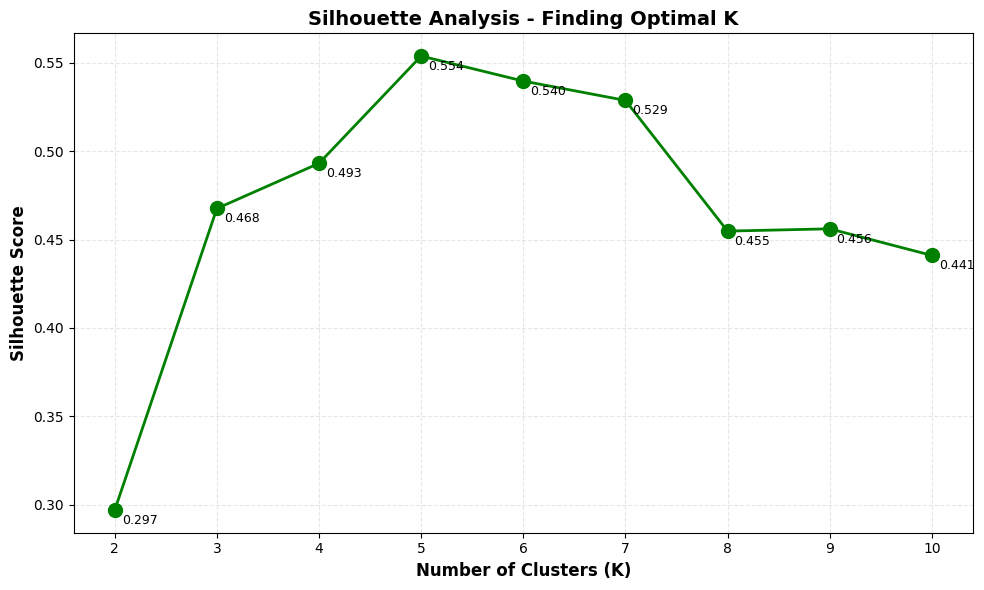


✓ Optimal K based on Silhouette Score: 5


In [143]:
# Use Silhouette Score as additional validation
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range_silhouette = range(2, 11)  

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score={score:.4f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range_silhouette, silhouette_scores, 'go-', linewidth=2, markersize=10)

for k, score in zip(K_range_silhouette, silhouette_scores):
    plt.annotate(f'{score:.3f}', 
                xy=(k, score), 
                xytext=(5, -10), 
                textcoords='offset points',
                fontsize=9)

plt.xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
plt.ylabel('Silhouette Score', fontsize=12, fontweight='bold')
plt.title('Silhouette Analysis - Finding Optimal K', fontsize=14, fontweight='bold')
plt.xticks(K_range_silhouette)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Find optimal K based on silhouette score
optimal_k_silhouette = K_range_silhouette[np.argmax(silhouette_scores)]
print(f"\n✓ Optimal K based on Silhouette Score: {optimal_k_silhouette}")


In [144]:
#result
print("\n" + "="*50)
print("SUMMARY - OPTIMAL K DETERMINATION")
print("="*50)
print("\nWCSS Values:")
for k, wcss_val in zip(K_range, wcss):
    print(f"K={k}: WCSS={wcss_val:.2f}")

print("\n\nSilhouette Scores:")
for k, score in zip(K_range_silhouette, silhouette_scores):
    print(f"K={k}: Silhouette Score={score:.4f}")

print("\n" + "="*50)
print("RECOMMENDATION:")
print("="*50)
print("Based on the Elbow Method, the optimal K is likely 5")
print("This is where the curve shows a clear 'elbow' bend")
print(f"Silhouette analysis suggests K={optimal_k_silhouette}")
print("="*50)

# Set optimal K for your assignment
optimal_k = 5
print(f"\n✓ Using K={optimal_k} for K-means clustering")



SUMMARY - OPTIMAL K DETERMINATION

WCSS Values:
K=1: WCSS=269981.28
K=2: WCSS=181363.60
K=3: WCSS=106348.37
K=4: WCSS=73679.79
K=5: WCSS=44448.46
K=6: WCSS=37233.81
K=7: WCSS=30241.34
K=8: WCSS=25036.42
K=9: WCSS=21916.79
K=10: WCSS=20072.07


Silhouette Scores:
K=2: Silhouette Score=0.2969
K=3: Silhouette Score=0.4676
K=4: Silhouette Score=0.4932
K=5: Silhouette Score=0.5539
K=6: Silhouette Score=0.5398
K=7: Silhouette Score=0.5288
K=8: Silhouette Score=0.4548
K=9: Silhouette Score=0.4561
K=10: Silhouette Score=0.4411

RECOMMENDATION:
Based on the Elbow Method, the optimal K is likely 5
This is where the curve shows a clear 'elbow' bend
Silhouette analysis suggests K=5

✓ Using K=5 for K-means clustering


In [ ]:
optimal_k = 5  # Based on elbow method results
print(f"Using optimal K = {optimal_k}")

Using optimal K = 5


In [ ]:
class KMeansVisualizer:
    def __init__(self, n_clusters, init_centroids=None, max_iter=10, 
                 random_state=None, force_all_iterations=False):
        self.n_clusters = n_clusters
        self.init_centroids = init_centroids
        self.max_iter = max_iter
        self.random_state = random_state
        self.force_all_iterations = force_all_iterations
        self.history = []
        
    def fit(self, X):
        np.random.seed(self.random_state)
        
        if self.init_centroids is not None:
            centroids = self.init_centroids.copy()
        else:
            indices = np.random.choice(len(X), self.n_clusters, replace=False)
            centroids = X[indices]
        
        for iteration in range(self.max_iter):
            distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
            
            self.history.append({
                'iteration': iteration + 1,
                'centroids': centroids.copy(),
                'labels': labels.copy()
            })
            
            new_centroids = np.array([X[labels == k].mean(axis=0) 
                                     for k in range(self.n_clusters)])
            
            # Only check convergence if force_all_iterations is False
            if not self.force_all_iterations:
                if np.allclose(centroids, new_centroids, atol=1e-4):
                    print(f"Converged at iteration {iteration + 1}")
                    break
                
            centroids = new_centroids
        
        self.final_centroids = centroids
        self.final_labels = labels
        
    def plot_iteration(self, X, iteration_idx, save_name=None):
        iter_data = self.history[iteration_idx]
        
        plt.figure(figsize=(10, 7))
        
        scatter = plt.scatter(X[:, 0], X[:, 1], 
                            c=iter_data['labels'], 
                            cmap='viridis', 
                            s=50, 
                            alpha=0.6,
                            edgecolors='black',
                            linewidth=0.5)
        
        plt.scatter(iter_data['centroids'][:, 0], 
                   iter_data['centroids'][:, 1],
                   c='red', 
                   marker='X', 
                   s=300, 
                   edgecolors='black',
                   linewidth=2,
                   label='Centroids',
                   zorder=5)
        
        plt.xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
        plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
        plt.title(f'K-Means Iteration {iter_data["iteration"]} (K={self.n_clusters})', 
                 fontsize=14, fontweight='bold')
        plt.legend(fontsize=10)
        plt.colorbar(scatter, label='Cluster ID')
        plt.grid(alpha=0.3, linestyle='--')
        
        if save_name:
            plt.savefig(f'{save_name}.png', dpi=150, bbox_inches='tight')
            print(f"✓ Saved: {save_name}.png")
        
        plt.show()


✓ Saved: A1.png


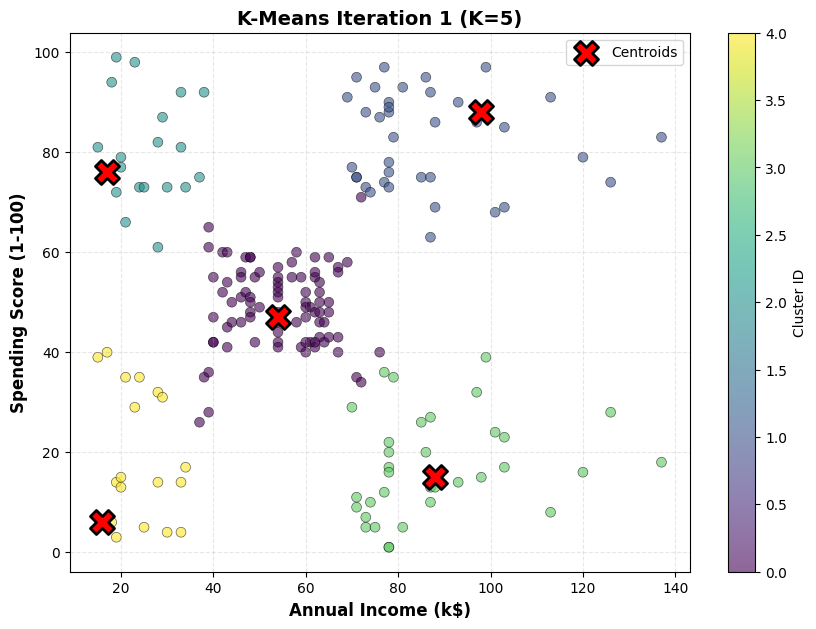

✓ Saved: A2.png


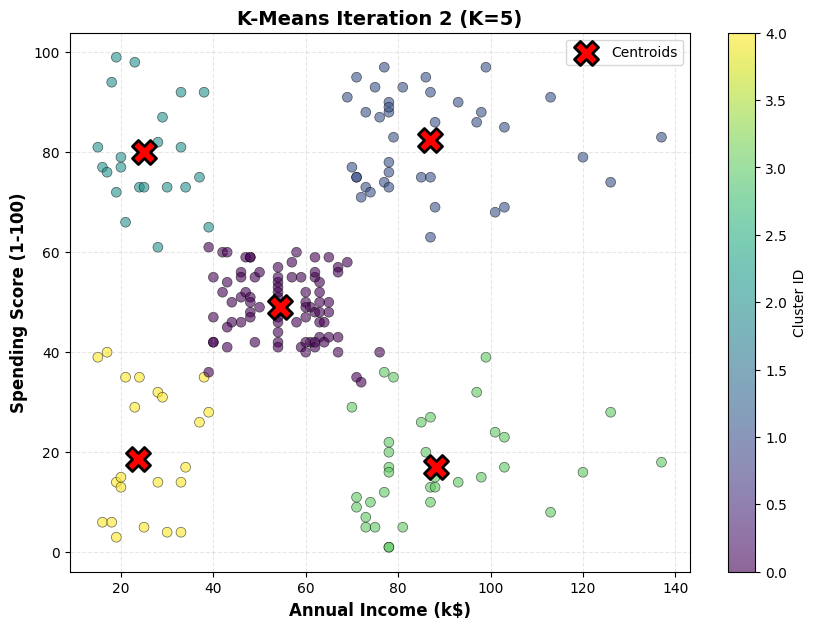

✓ Saved: A3.png


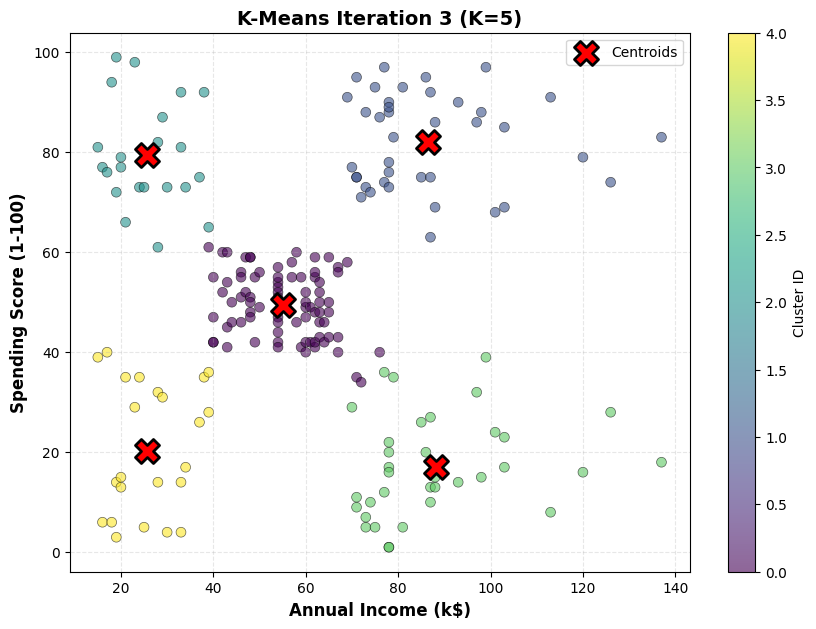

✓ Saved: A4.png


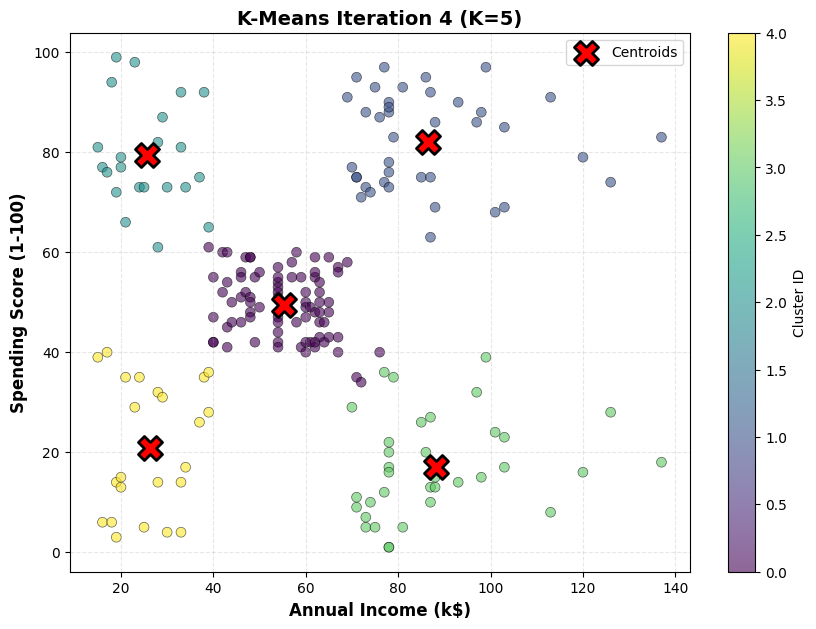

✓ Saved: A5.png


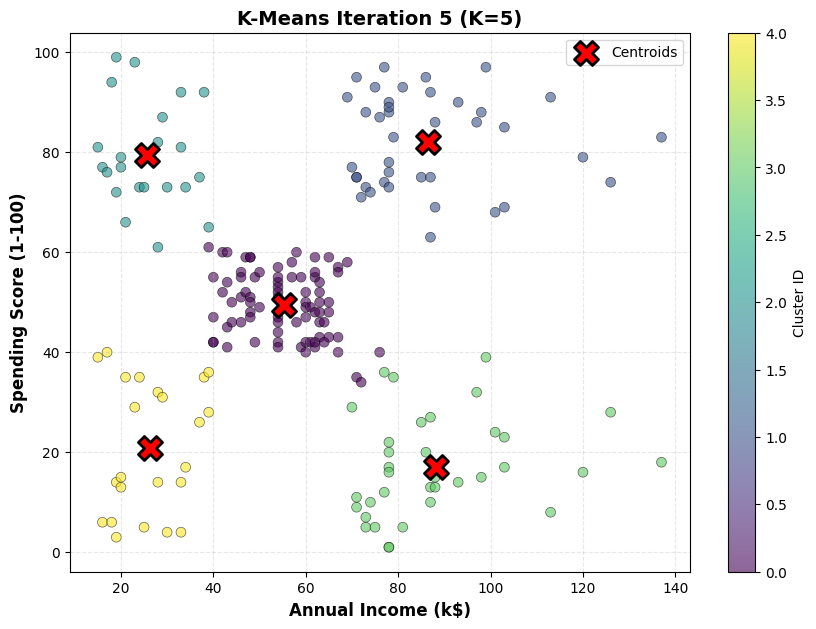

✓ Generated A1-A5 (iterations 4-5 show converged centroids)
Converged at iteration 7
✓ Saved: B1.png


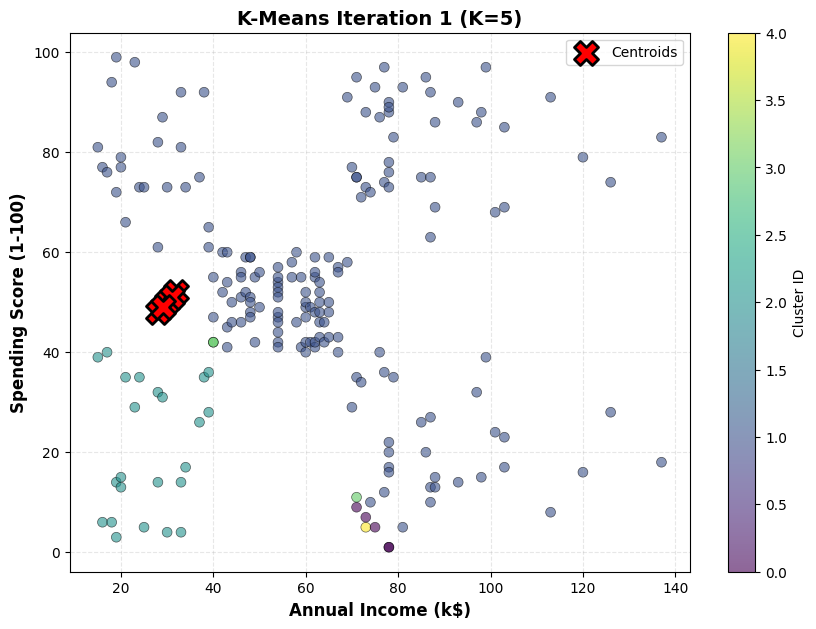

✓ Saved: B2.png


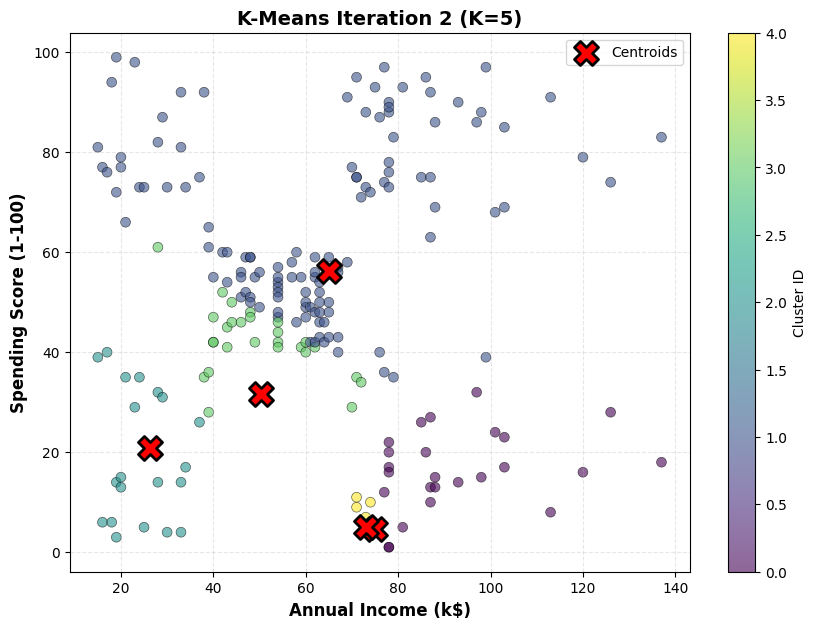

✓ Saved: B3.png


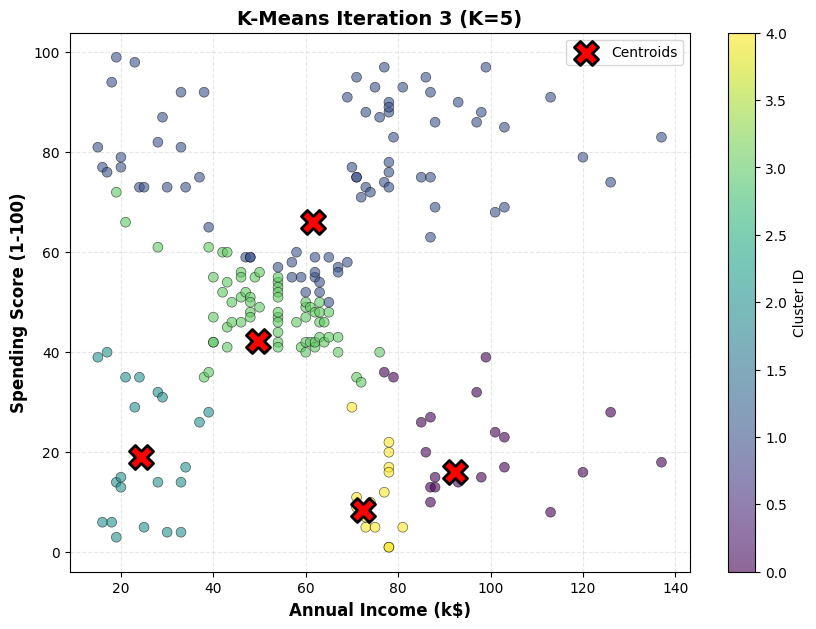

✓ Saved: B4.png


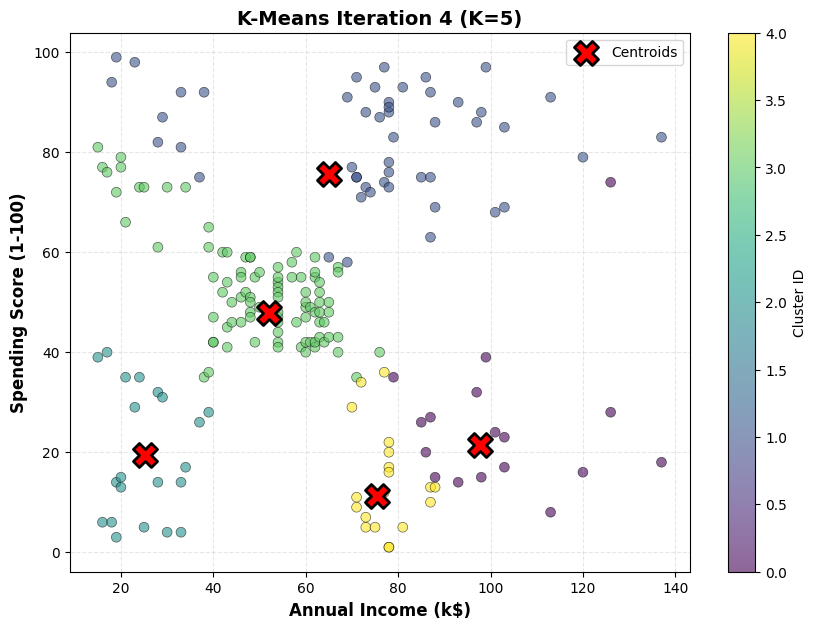

✓ Saved: B5.png


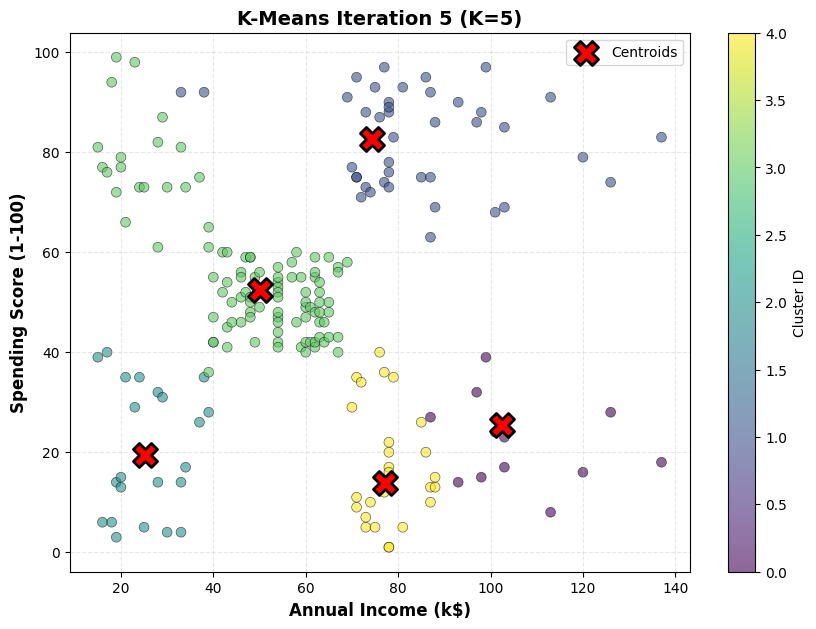

✓ Generated B1-B5


In [157]:
# FINAL RECOMMENDED CODE
optimal_k = 5

# Good run
centroids_good, _ = kmeans_plusplus(X, n_clusters=optimal_k, random_state=42)

kmeans_good = KMeansVisualizer(n_clusters=optimal_k,
                               init_centroids=centroids_good,
                               max_iter=5,
                               force_all_iterations=True,
                               random_state=42)
kmeans_good.fit(X)

for i in range(5):
    kmeans_good.plot_iteration(X, i, save_name=f'A{i+1}')

print("✓ Generated A1-A5 (iterations 4-5 show converged centroids)")

# Bad run
bad_centroids = np.array([[30,50], [32,52], [28,48], [31,51], [29,49]])

kmeans_bad = KMeansVisualizer(n_clusters=optimal_k,
                              init_centroids=bad_centroids,
                              max_iter=10,
                              force_all_iterations=False,
                              random_state=42)
kmeans_bad.fit(X)

for i in range(5):
    kmeans_bad.plot_iteration(X, i, save_name=f'B{i+1}')

print("✓ Generated B1-B5")
